In [217]:
import numpy as np
import pandas as pd
import chardet




In [218]:
df = pd.read_csv("spam.csv", encoding='cp1252')

In [219]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
645,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
4166,ham,Are you at work right now ?,NaN,NaN,NaN
2287,ham,Alex knows a guy who sells mids but he's down ...,NaN,NaN,NaN
3407,spam,Do you want a New Nokia 3510i colour phone Del...,NaN,NaN,NaN
3481,spam,Do you want a NEW video phone750 anytime any n...,NaN,NaN,NaN


In [220]:
df.shape


(5572, 5)

In [221]:
#1.Data cleaning
#2.eda
#3.text processing
#4.model building
#5.evaluation
#6.improvement
#7.website
#8.deploy


#1 data cleaning

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.sample(5)


,v1,v2
1504,ham,Oh my God. I'm almost home
4998,ham,"Hmph. Go head, big baller."
4218,ham,Anything lor if they all go then i go lor...
2416,ham,"Could you not read me, my Love ? I answered you"
4828,ham,"How long before you get reply, just defer admi..."


In [223]:
#renaming the cols

df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2838,ham,"Easy mate, * guess the quick drink was bit amb...",NaN,NaN,NaN
4173,ham,And pls pls drink plenty plenty water,NaN,NaN,NaN
3445,ham,"Mon okie lor... Haha, best is cheap n gd food ...",NaN,NaN,NaN
4714,ham,S:)8 min to go for lunch:),NaN,NaN,NaN
734,ham,Leaving to qatar tonite in search of an opport...,NaN,NaN,NaN


In [224]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [225]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [230]:
df.drop(columns=['target_encoded'],inplace=True)

KeyError: "['target_encoded'] not found in axis"

In [231]:
df.head()


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [232]:
#missing value
df.isnull().sum()

target           0
text             0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [233]:
#check for duplicate values
df.duplicated().sum()

np.int64(0)

In [234]:
#remove duplicate
df = df.drop_duplicates(keep='first')


In [235]:
df.duplicated().sum()

np.int64(0)

In [236]:
df.shape


(5169, 5)

# 2 eda


In [237]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

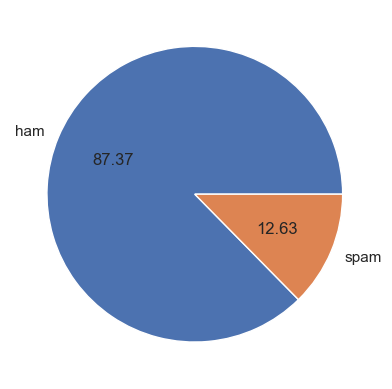

In [238]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [239]:
#data is imbalanced

In [240]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [241]:
df['num_characters']=df['text'].apply(len)

In [242]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [243]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [244]:
#num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [245]:
df.head()


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [246]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [247]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [248]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [249]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [250]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [251]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

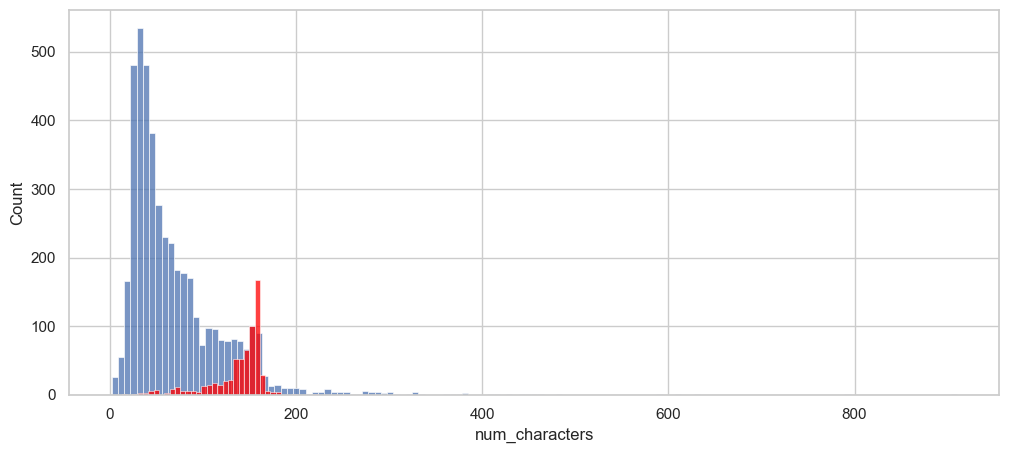

In [252]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

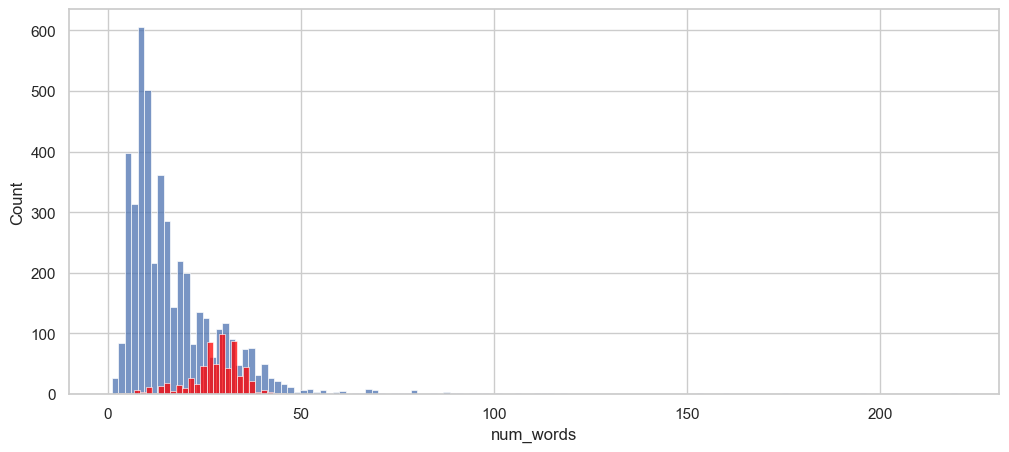

In [253]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

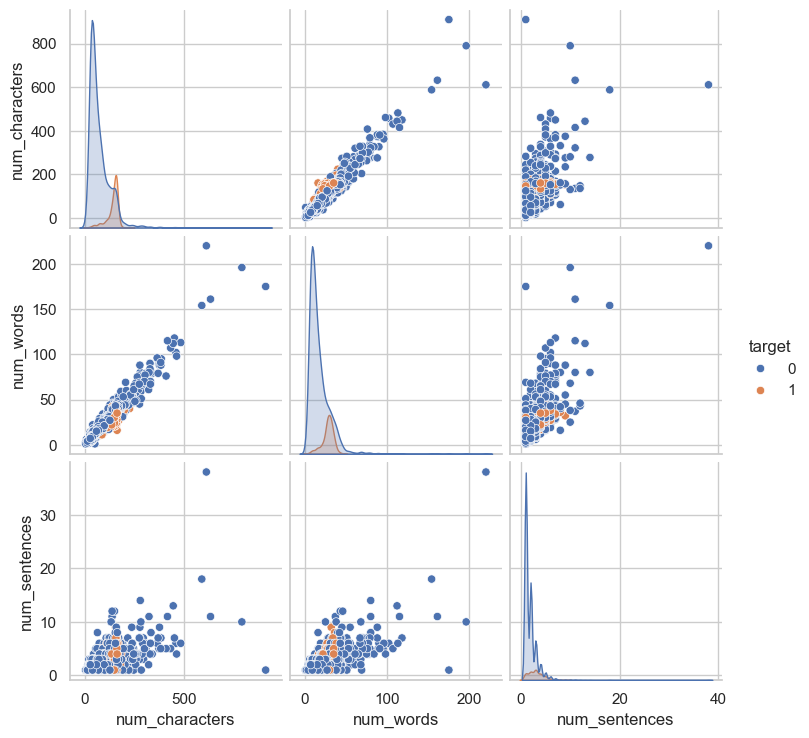

In [254]:
sns.pairplot(df,hue='target')

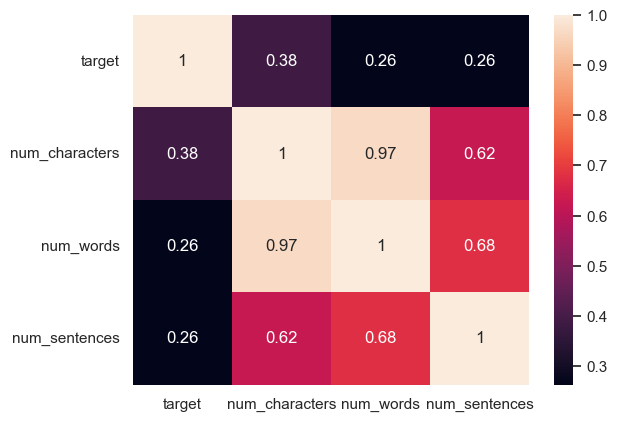

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [256]:
#text transforming 

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

            
    return " ".join(y)

In [257]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [258]:
df['transformed_text']=df['text'].apply(transform_text)

In [259]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [260]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [261]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

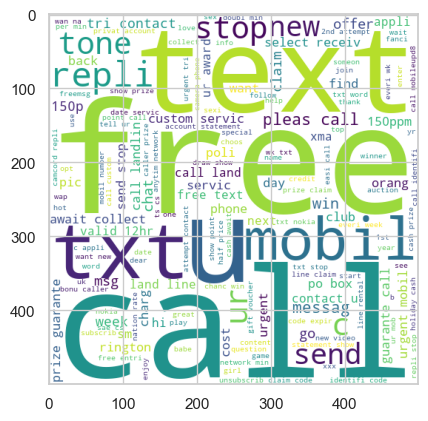

In [262]:
plt.imshow(spam_wc)

In [263]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

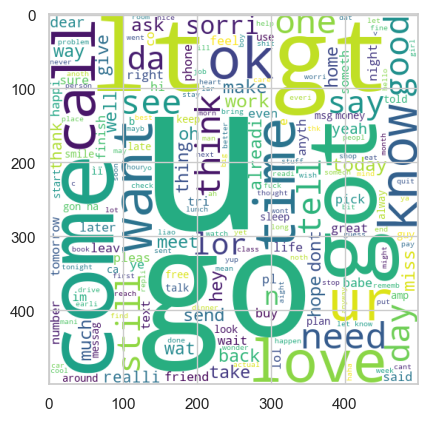

In [264]:
plt.imshow(ham_wc)

In [265]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [266]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [267]:
len(spam_corpus)

9939

In [268]:
from collections import Counter


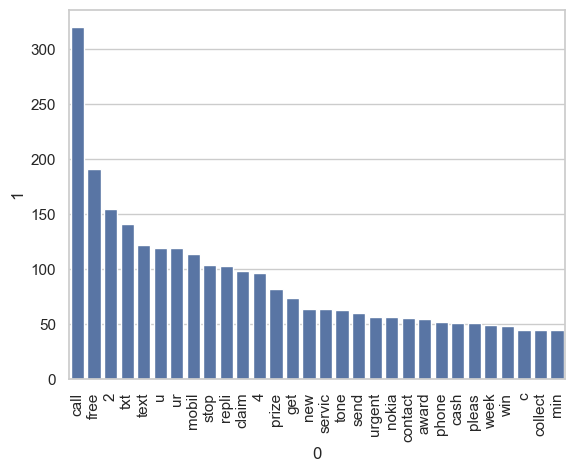

In [269]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [270]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [271]:
len(ham_corpus)

35404

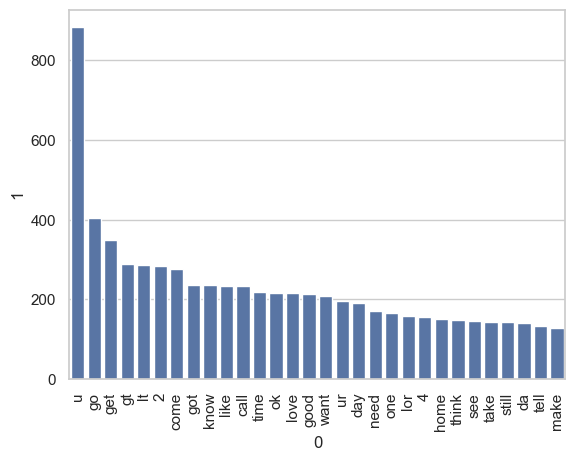

In [272]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [273]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


4.model building

In [276]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')


In [277]:
df.head() #bag of words

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [304]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [305]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [306]:
x.shape

(5169, 6708)

In [307]:
y = df['target'].values

In [308]:
y


array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [311]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [312]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [314]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [317]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [318]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [319]:
#tfdif --> MNB

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [327]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [328]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [329]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [331]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [333]:
accuracy_scores = []
precisison_scores = []

for name, clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.